# Feature analysis

In [509]:
from SimpleCV import *
# from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
import pandas as pd
# import cv2 
# import glob
# import sklearn 

df = pd.read_csv("../dataset-numpy/dataset_features.csv")

#### Describe

visualize the means, standard deviation, minimum, maximum etc of all features.

In [457]:
df.describe()

,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,...,grid_6_7,grid_7_0,grid_7_1,grid_7_2,grid_7_3,grid_7_4,grid_7_5,grid_7_6,grid_7_7,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,15.859298,15.380416,50.857330,29.997917,20.457292,0.377083,0.295312,0.211458,0.348958,...,2.423958,0.157812,0.149479,0.050521,0.001563,0,0.022917,0.182292,0.288542,4.532813
std,67.428881,1.193617,1.869070,65.489537,0.064533,2.035446,0.574330,0.456302,0.408449,0.476765,...,4.553251,1.132490,1.011683,0.464531,0.039508,0,0.246911,0.891801,1.539500,2.868122
min,153.000000,11.835737,10.582800,-87.878899,28.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
25%,244.000000,15.077516,14.116460,65.718203,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,2.000000
50%,275.500000,15.797984,15.295089,85.236358,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,5.000000
75%,326.000000,16.571982,16.354908,90.000000,30.000000,22.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,7.000000
max,512.000000,20.410788,20.841542,90.000000,30.000000,30.000000,2.000000,1.000000,1.000000,1.000000,...,16.000000,16.000000,16.000000,8.000000,1.000000,0,6.000000,12.000000,16.000000,9.000000


#### Number of holes 
The hypothesis of the feature "number of holes": The numbers 0/6/9 and 8 can be identified out of the image. 
The number 0,6 and 9 should have 1 hole.
The number 8 should have 2 holes. 
The other numbers should have no holes.

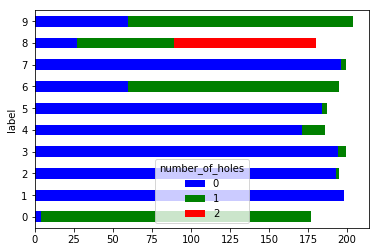

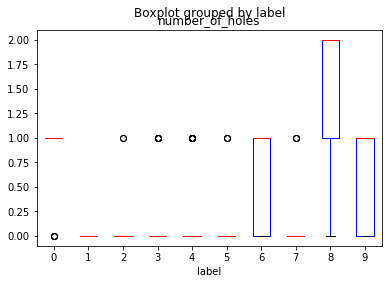

In [493]:
df2 = df.groupby(['number_of_holes', 'label'])['number_of_holes'].count().unstack('number_of_holes').fillna(0)
df2.plot.barh(stacked=True)


df.boxplot(by='label',column='number_of_holes', grid=False)

###### Conclusion Number of holes
When looking at the graph above, it is visible that 8 is the only number with a feature of 2 holes, which is correct. This makes it unique from the other numbers and it makes "number of holes" a good feature. What is notable is that with a lot of numbers there are different amounts of holes, this could be due to bad data. 

#### Centroid is empty
The hypothesis of the feature "centroid is empty": This feature checks if the middle pixel of the blob(number) is black or white. If the middle pixle is black, the number should be a 0. This should be the case because 0 has a hole on the inside. The other numbers should (with some exceptions like a 4 for example) have a white pixel.


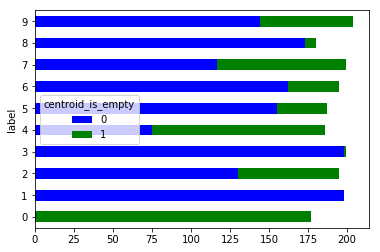

In [460]:
df2 = df.groupby(['centroid_is_empty', 'label'])['centroid_is_empty'].count().unstack('centroid_is_empty').fillna(0)
df2.plot.barh(stacked=True)

###### Conclusion Centroid is empty
In the graph above it is visible that 0 is the only number with a fully green bar. This is as was accepted. So you could say it is a good feature. But it is not as good as expected. Looking at the other numbers, there is also a lot of green visible, and combinations of colours. 

##### Centroid top is empty
The hypothesis of the feature "centroid top is empty": This feature checks if the middel pixel of the top part (blob is cut in half) of the blob(number) is black of white. With this feature it should be clear that if the pixel is black it is the number 9/8/0. This should be the case because 9/8/0 all have holes at the upperhalf. 

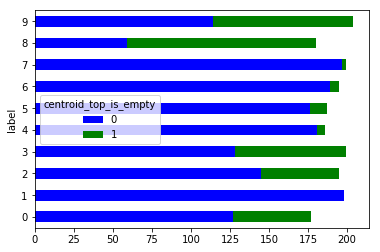

In [461]:
df2 = df.groupby(['centroid_top_is_empty', 'label'])['centroid_top_is_empty'].count().unstack('centroid_top_is_empty').fillna(0)
df2.plot.barh(stacked=True)

###### Conclusion Centroid top is empty
In the graph above it is visible that there is not one number that really stands out. It was expected that 9 would stand out, but if we look at the graph and think about it know. There are a lot more numbers where the top is 'empty'. This could still be used as a feature, but is not as good as was first thought.

##### Centroid bottom is empty
The hypothesis of the feature "centroid bottom is empty": This feature checks if the middel pixel of the bottom part (blob is cut in half) of the blob(number) is black of white. With this feature it should be clear that if the pixel is black it is the number 6/8/0. This should be the case because 6/8/0 all have a hole at the lower half. 

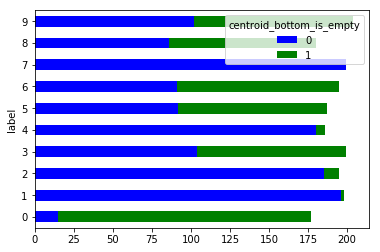

In [494]:
df2 = df.groupby(['centroid_bottom_is_empty', 'label'])['centroid_bottom_is_empty'].count().unstack('centroid_bottom_is_empty').fillna(0)
df2.plot.barh(stacked=True)

###### Conclusion Centroid bottom is empty
In the graph above it is visible that the numbers that were expected to stand out don't. The number 0 does, but 8 and 6 are around 50/50 on empty and filled. There are also numbers where the focus was not on, but which did well 7,4,2 and 1, this could also be usefull information. This feature did not give the expected output but gave new unexpected usefull info. 

#### Centroid location

These scatter plots show the location of the centroid in the image.

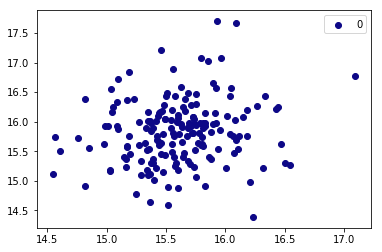

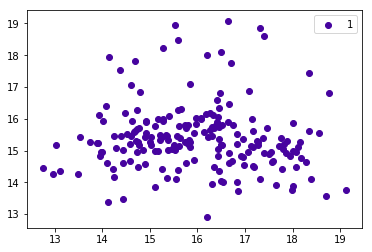

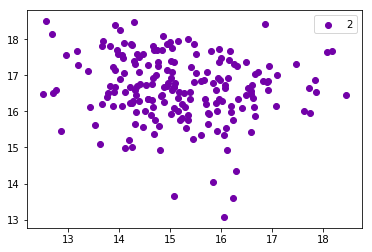

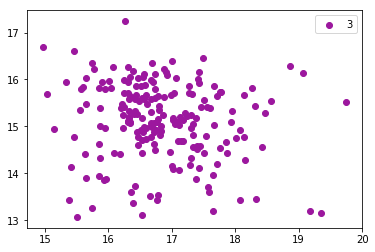

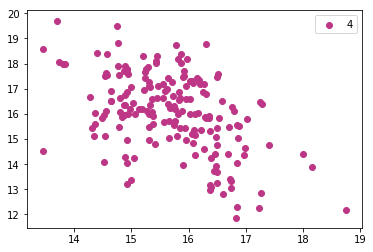

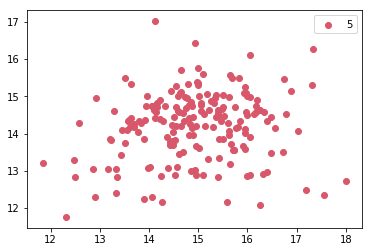

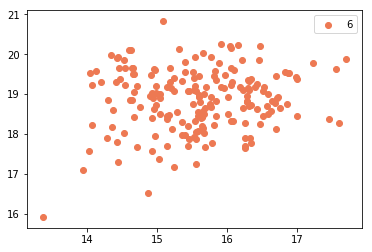

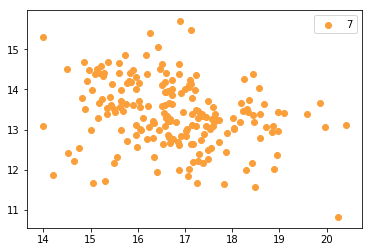

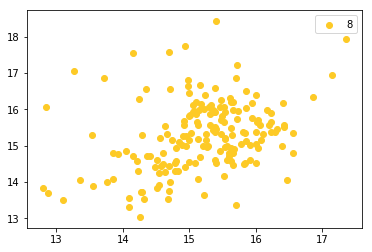

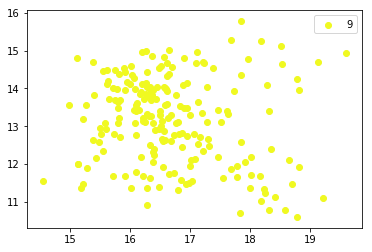

In [504]:
# colours
colors = cm.plasma(np.linspace(0, 1, 10))

#check x and y centroids
for i in range(10):
    plt.figure()
    centroid = df[(df.label == i)]
    xCentroid = centroid.blob_centroid_x
    yCentroid = centroid.blob_centroid_y
    plt.scatter(x=xCentroid, y= yCentroid, c=colors[i], label=i)
    plt.legend()

#### Centroid of the 6 and 9. 
We can see that there is a distinct difference. We can differentiate the 6 and the 9 by eye already based on these features.

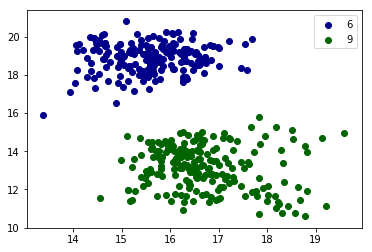

In [506]:

centroid6 = df[(df.label == 6)]
xCentroid6 = centroid6.blob_centroid_x
yCentroid6 = centroid6.blob_centroid_y
centroid9 = df[(df.label == 9)]
xCentroid9 = centroid9.blob_centroid_x
yCentroid9 = centroid9.blob_centroid_y
plt.scatter(x= xCentroid6, y= yCentroid6, c='DarkBlue', label = 6)
plt.scatter(x= xCentroid9, y= yCentroid9, c='DarkGreen', label = 9)
plt.legend()

#### Centroid of the 8 and 0

Here we cannot see a distinctive difference between the 8 and the 0. The 8 has more wide spread scatters while the 0 is grouped together.

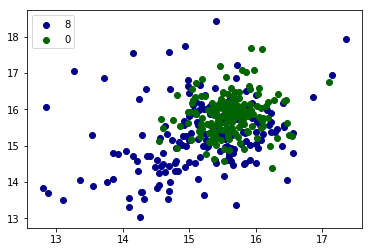

In [507]:
centroid8 = df[(df.label == 8)]
xCentroid8 = centroid8['blob_centroid_x']
yCentroid8 = centroid8['blob_centroid_y']
centroid0 = df[(df.label == 0)]
xCentroid0 = centroid0['blob_centroid_x']
yCentroid0 = centroid0['blob_centroid_y']
plt.scatter(x= xCentroid8, y= yCentroid8, c='DarkBlue', label = 8)
plt.scatter(x= xCentroid0, y= yCentroid0, c='DarkGreen', label = 0)
plt.legend()


#### Heatmap of all the numbers

In this heatmap we can clearly see the numbers displayed. The feature used here is the grid_n_n_. This feature counts the amount of filled pixels in a 4x4 grid piece. We take the mean of all the filled pixels of the grid_n_n and lay it out on the 8x8. The places where the pixels are redder mean that these are more often filled than the places where the pixels are yellow. 

When looking at the describe table and the heatmap something stands out, some parts of the grid are not filled in. In the heatmap this is visible due to the yellow strokes next to the numbers (far left & far right) and in the describe this is visible in the mean - of these corresponding grids-. An option would be to remove these grids out of the feature list. With an iteration through the means of the grids the grids that are under a certain pixel threshold are dropped from the feature list.


In [527]:
means = df.groupby('label').mean()
size = 8

def mean_weight_matrix(label):
    m = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            m[x][y] = means["grid_" + str(x) + "_" + str(y)][label]
    return m.T

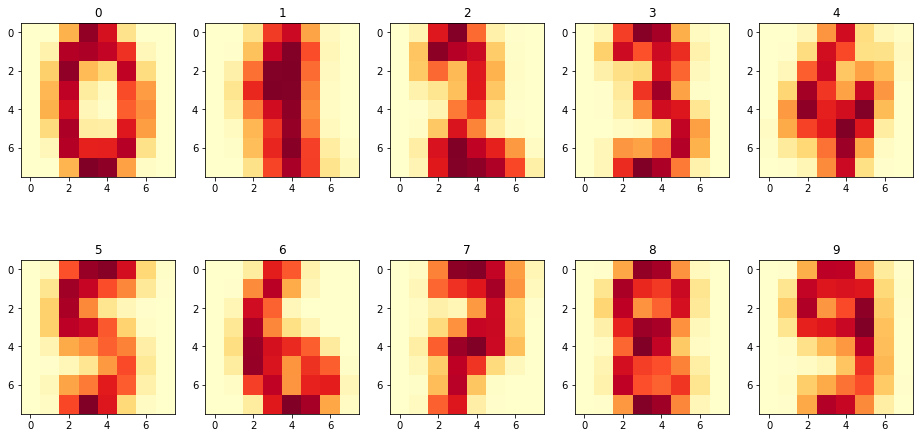

In [545]:
fig, axs = plt.subplots(2, int(10 / 2), figsize=(16,8))

for i in range(10):
    sub_fig = axs[1 if i > (10 / 2.0 - 1) else 0][int(i % (10 / 2))]
    sub_fig.set_title(str(i))
    sub_fig.imshow(mean_weight_matrix(i), cmap='YlOrRd')

#### Grids
W

In [538]:
# plt.scatter(x= df.label, y= df.centroid_is_empty)

In [539]:
# plt.scatter(x=df.label, y= df.centroid_top_is_empty)

In [540]:
# plt.scatter(x=df.label, y= df.centroid_bottom_is_empty)

In [477]:
#digit, amount of holes, counter
#df1 = df.groupby(['label', 'number_of_holes']).plot()
# df1.head()
# df1 = df.filter(items=['label', 'inverted_blob_count'])


# df1.groupby(['label', 'inverted_blob_count']).head()
# DataFrame({'count' : df1.groupby( ['label', 'inverted_blob_count']).size()}).reset_index()
# xCentroid = df['inverted_blob_count']
# yCentroid = df1.count()
# plt.scatter(x= xCentroid, y= xCentroid, c='DarkBlue')

# preprocessing

In [478]:
df

,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,...,grid_6_7,grid_7_0,grid_7_1,grid_7_2,grid_7_3,grid_7_4,grid_7_5,grid_7_6,grid_7_7,label
0,424.0,15.424528,15.757469,90.000000,30,20,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,447.5,15.733333,16.043575,90.000000,30,21,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,455.0,16.009158,15.209890,90.000000,30,19,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,438.5,15.229571,16.378563,90.000000,30,20,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,462.5,15.646126,16.255135,90.000000,30,20,1,1,1,0,...,2,0,0,0,0,0,0,0,0,0
5,432.0,15.749614,15.942901,90.000000,30,20,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,425.5,15.910302,16.151586,90.000000,30,20,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,503.5,15.370738,15.299239,90.000000,30,22,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,387.5,16.318280,15.209892,90.000000,30,20,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,440.5,15.448733,16.160045,90.000000,30,20,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0



When the mean of a grid x is between 0 and 20 % it will not distingues itself from other numbers. An option would be to remove these grids out of the feature list. With an iteration through the means of the grids the grids that are under 5 pixels are dropped from the feature list.

In [479]:
columnsToDrop = []
normalizeColumns = []

for column in df:
    if(df[column].mean() < 5.0) & ('grid' in column):
        df = df.drop(column, axis=1)
    elif 'label' not in column:
        normalizeColumns.append(column)

In [480]:
# remove blob angle & blob height
df = df.drop(['blob_height'], axis=1)
# df = df.drop(['blob_height'], axis=1)

In [481]:
normalizeColumns.remove('blob_height')


In [482]:
df.to_csv("../dataset-numpy/dataset_analysis.csv", sep=',', encoding='utf-8', index=False)

In [483]:
# #### normalization 
# min_max_scaler = preprocessing.MinMaxScaler()

# df_normalized = df.copy()
# print df_normalized.columns
# columns = ['grid_1_3', 'grid_1_4', 'grid_1_5', 'grid_1_6', 'grid_2_3', 
#            'grid_2_4', 'grid_2_5', 'grid_2_6', 'grid_3_3', 'grid_3_4', 
#            'grid_3_5', 'grid_3_6', 'grid_4_3', 'grid_4_4', 'grid_4_5', 
#            'grid_4_6', 'grid_5_3', 'grid_5_4', 'grid_5_5', 'grid_5_6', 
#            'grid_6_3', 'grid_6_4', 'grid_6_5', 'grid_6_6', 'grid_7_3', 
#            'grid_7_4', 'grid_7_5', 'grid_7_6', 'grid_8_3', 'grid_8_4', 
#            'grid_8_5', 'grid_8_6', 'blob_area', 'blob_centroid_x', 
#            'blob_centroid_y', 'number_of_holes', 'centroid_is_empty', 
#            'centroid_top_is_empty', 'centroid_bottom_is_empty']
# scaled = min_max_scaler.fit_transform(df_normalized[columns])
# df_normalized[columns] = pd.DataFrame(scaled, columns= columns)
# df_normalized.head() 

#### normalization 
print normalizeColumns
min_max_scaler = preprocessing.MinMaxScaler()

df_normalized = df.copy()
columns = normalizeColumns
# columns = ['grid_1_3', 'grid_1_4', 'grid_1_5', 'grid_1_6', 'grid_2_3', 
#            'grid_2_4', 'grid_2_5', 'grid_2_6', 'grid_3_3', 'grid_3_4', 
#            'grid_3_5', 'grid_3_6', 'grid_4_3', 'grid_4_4', 'grid_4_5', 
#            'grid_4_6', 'grid_5_3', 'grid_5_4', 'grid_5_5', 'grid_5_6', 
#            'grid_6_3', 'grid_6_4', 'grid_6_5', 'grid_6_6', 'grid_7_3', 
#            'grid_7_4', 'grid_7_5', 'grid_7_6', 'grid_8_3', 'grid_8_4', 
#            'grid_8_5', 'grid_8_6', 'blob_area', 'blob_centroid_x', 
#            'blob_centroid_y', 'number_of_holes', 'centroid_is_empty', 
#            'centroid_top_is_empty', 'centroid_bottom_is_empty']
scaled = min_max_scaler.fit_transform(df_normalized[normalizeColumns])
df_normalized[normalizeColumns] = pd.DataFrame(scaled, columns= normalizeColumns)
df_normalized.head() 




['blob_area', 'blob_centroid_x', 'blob_centroid_y', 'blob_angle', 'blob_width', 'number_of_holes', 'centroid_is_empty', 'centroid_top_is_empty', 'centroid_bottom_is_empty', 'grid_2_0', 'grid_2_1', 'grid_2_2', 'grid_2_3', 'grid_2_4', 'grid_2_5', 'grid_2_6', 'grid_2_7', 'grid_3_0', 'grid_3_1', 'grid_3_2', 'grid_3_3', 'grid_3_4', 'grid_3_5', 'grid_3_6', 'grid_3_7', 'grid_4_0', 'grid_4_1', 'grid_4_2', 'grid_4_3', 'grid_4_4', 'grid_4_5', 'grid_4_6', 'grid_4_7', 'grid_5_0', 'grid_5_1', 'grid_5_2', 'grid_5_3', 'grid_5_4', 'grid_5_5', 'grid_5_6', 'grid_5_7']


,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,grid_2_0,...,grid_4_7,grid_5_0,grid_5_1,grid_5_2,grid_5_3,grid_5_4,grid_5_5,grid_5_6,grid_5_7,label
0,0.754875,0.418515,0.504416,1,0.50,0.5,1,1,1,0.3125,...,0.75,0.0625,0.6250,1.0000,0.8125,0.8125,1.0000,0.7500,0.250,0
1,0.820334,0.454527,0.532305,1,0.55,0.5,1,1,1,0.1250,...,1.00,0.0625,0.6250,0.7500,0.1875,0.1250,0.3750,0.8125,0.625,0
2,0.841226,0.486693,0.451039,1,0.45,0.5,1,0,1,0.2500,...,1.00,1.0000,1.0000,0.8125,0.5625,0.5000,0.8125,0.7500,0.250,0
3,0.795265,0.395780,0.564958,1,0.50,0.5,1,0,1,0.6250,...,1.00,0.0000,0.3125,0.8750,0.6250,0.5000,0.5000,1.0000,0.625,0
4,0.862117,0.444358,0.552927,1,0.50,0.5,1,1,0,0.6250,...,1.00,0.0000,0.8750,0.9375,0.5625,0.3125,0.5000,0.8750,0.875,0


In [484]:
df_normalized.to_csv("../dataset-numpy/dataset_analysis_normalized.csv", sep=',', encoding='utf-8', index=False)